In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

### Read an ablation study for a given seed : 

In [4]:
Ablation_study = [[None,"change_dec_only"],[None,"change_enc_only"],[None,"change_enc_dec"],
                  ["remove_enc","change_dec_only"],["remove_dec","change_enc_only"]]

seed = 42
ablation = Ablation_study[2]
shared_layers = True

data = pd.read_csv("save_metrics/new_ablation/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers) +"_seed="+str(seed))
data

,Unnamed: 0,Accuracy,Validity,Proximity,Prediction_gain,Proximity_score,Sparsity,Diversity
0,adult,0.830856,0.999877,7.739+/-2.143,0.757+/-0.147,0.045+/-0.119,9.284+/-2.101,2.128+/-0.767
1,student,0.936311,0.999632,11.585+/-2.418,0.937+/-0.112,0.37+/-0.179,33.128+/-2.361,3.19+/-0.387
2,heloc,0.712811,1.000000,5.64+/-1.979,0.665+/-0.138,0.211+/-0.229,24.064+/-1.437,1.291+/-0.828
3,student_performance,0.907975,0.944785,19.827+/-3.433,0.92+/-0.247,0.716+/-0.063,21.607+/-3.413,4.255+/-0.405
4,titanic,0.825112,0.982063,15.746+/-3.771,0.728+/-0.215,0.694+/-0.225,17.543+/-3.752,3.445+/-0.708
5,breast_cancer,0.972028,1.000000,5.163+/-1.498,0.986+/-0.063,0.281+/-0.03,30.0+/-0.0,0.562+/-0.482


### Mean and std over the seed for each study:

In [5]:
for ablation in Ablation_study : 
    for shared_layers in [True,False] : 
        L=[]
        for seed in [42,12,34,56,3,67,98,4,23,8] :
            data = pd.read_csv("save_metrics/new_ablation/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers) +"_seed="+str(seed))
            data_copy = data.copy()
            for col in list(data_copy) : 
                if col not in ["Accuracy","Validity","Unnamed: 0"] :
                    data_copy[col] =  data_copy[col].apply(lambda x : x.split("+")[0])
                    data_copy[col] = pd.to_numeric(data_copy[col])
            L.append(data_copy)
        mean_data_frame_seed = pd.concat(L).groupby("Unnamed: 0").mean()
        std_data_frame_seed  = pd.concat(L).groupby("Unnamed: 0").std()
        final_dataframe = mean_data_frame_seed.round(2).astype(str) + "+/-" +  std_data_frame_seed.round(3).astype(str)
        final_dataframe.to_csv("save_metrics/mean_ablation_seed/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers))

### Read average study : 

Original Vcnet:

In [4]:
Ablation_study = [[None,"change_dec_only"],[None,"change_enc_only"],[None,"change_enc_dec"],
                  ["remove_enc","change_dec_only"],["remove_dec","change_enc_only"]]

ablation = Ablation_study[2]
shared_layers = True

data = pd.read_csv("save_metrics/mean_ablation_seed/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers),index_col=0)
data

,Accuracy,Validity,Proximity,Prediction_gain,Proximity_score,Sparsity,Diversity
Unnamed: 0,,,,,,,
adult,0.83+/-0.001,1.0+/-0.0,7.69+/-0.087,0.75+/-0.009,0.05+/-0.003,9.27+/-0.081,2.11+/-0.02
breast_cancer,0.97+/-0.005,1.0+/-0.0,5.15+/-0.033,0.99+/-0.001,0.27+/-0.006,30.0+/-0.0,0.55+/-0.007
heloc,0.72+/-0.003,1.0+/-0.0,5.58+/-0.066,0.65+/-0.022,0.22+/-0.014,24.01+/-0.06,1.32+/-0.044
student,0.93+/-0.003,1.0+/-0.0,11.56+/-0.047,0.94+/-0.006,0.37+/-0.003,33.1+/-0.031,3.19+/-0.008
student_performance,0.9+/-0.004,0.91+/-0.022,19.78+/-0.297,0.88+/-0.021,0.71+/-0.005,21.56+/-0.296,4.27+/-0.02
titanic,0.82+/-0.003,0.97+/-0.011,15.55+/-0.259,0.72+/-0.011,0.71+/-0.015,17.34+/-0.256,3.5+/-0.046


In [6]:
Ablation_study = [[None,"change_dec_only"],[None,"change_enc_only"],[None,"change_enc_dec"],
                  ["remove_enc","change_dec_only"],["remove_dec","change_enc_only"]]

ablation = Ablation_study[3]
shared_layers = True

data = pd.read_csv("save_metrics/mean_ablation_seed/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers),index_col=0)
data

,Accuracy,Validity,Proximity,Prediction_gain,Proximity_score,Sparsity,Diversity
Unnamed: 0,,,,,,,
adult,0.83+/-0.001,1.0+/-0.0,7.71+/-0.08,0.74+/-0.008,0.05+/-0.003,9.3+/-0.068,2.14+/-0.026
breast_cancer,0.97+/-0.004,1.0+/-0.0,5.17+/-0.031,0.99+/-0.0,0.27+/-0.006,30.0+/-0.002,0.56+/-0.006
heloc,0.71+/-0.005,1.0+/-0.0,5.6+/-0.051,0.65+/-0.02,0.23+/-0.015,23.99+/-0.049,1.34+/-0.034
student,0.93+/-0.002,1.0+/-0.0,11.58+/-0.053,0.94+/-0.005,0.37+/-0.004,33.1+/-0.043,3.19+/-0.009
student_performance,0.9+/-0.008,0.92+/-0.02,19.81+/-0.271,0.89+/-0.021,0.71+/-0.007,21.59+/-0.271,4.27+/-0.017
titanic,0.82+/-0.008,0.98+/-0.007,15.72+/-0.405,0.73+/-0.018,0.71+/-0.015,17.51+/-0.397,3.51+/-0.025


#### Boxplot : 

In [12]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

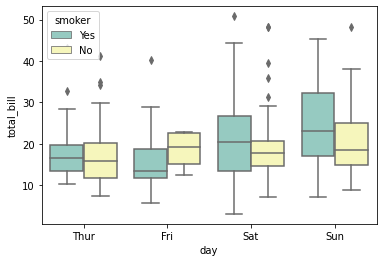

In [13]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3")

In [6]:
# Transform "7.739+/-2.143 " into 7.739 for each metric 
def mean_std_to_mean(df) : 
    for col in ["Proximity","Prediction_gain","Proximity_score","Sparsity","Diversity"] : 
        df[col] = df[col].apply(lambda x : float(x.split("+")[0]))
    return(df)


S = [42,12,34,56,3,67,98,4,23,8]
#Ablation_study = [[None,"change_dec_only"],[None,"change_enc_only"],[None,"change_enc_dec"],
                  #["remove_enc","change_dec_only"],["remove_dec","change_enc_only"]]

Ablation_study = [[None,"change_dec_only"],[None,"change_enc_dec"],
                  ["remove_enc","change_dec_only"]]
Shared_layers = [True,False]
#Shared_layers = [True]

df = pd.DataFrame(columns=["Dataset","Accuracy","Validity","Proximity","Prediction_gain",
                           "Proximity_score","Sparsity","Diversity","Ablation","Seed"])
for ablation in Ablation_study : 
    for shared_layers in Shared_layers : 
        for seed in S : 
            data = pd.read_csv("save_metrics/new_ablation/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers) +"_seed="+str(seed))
            ablation_name = '_'.join(np.array(ablation).astype(str)) + "_" + ((shared_layers) * "Independent_Vcnet")
            #ablation_name = '_'.join(np.array(ablation).astype(str))
            # Create (rename) Dataset column 
            data = data.rename({'Unnamed: 0': 'Dataset'}, axis=1)
            # Transform "7.739+/-2.143 " into 7.739 for each metric 
            mean_std_to_mean(data)
            # Write corresponding ablation and seed 
            data["Ablation"] = ablation_name 
            data["Seed"] = seed 
            df = df.append(data,ignore_index = True)
#df.to_csv("save_metrics/plot/metrics_ablation_shared_layers.csv")

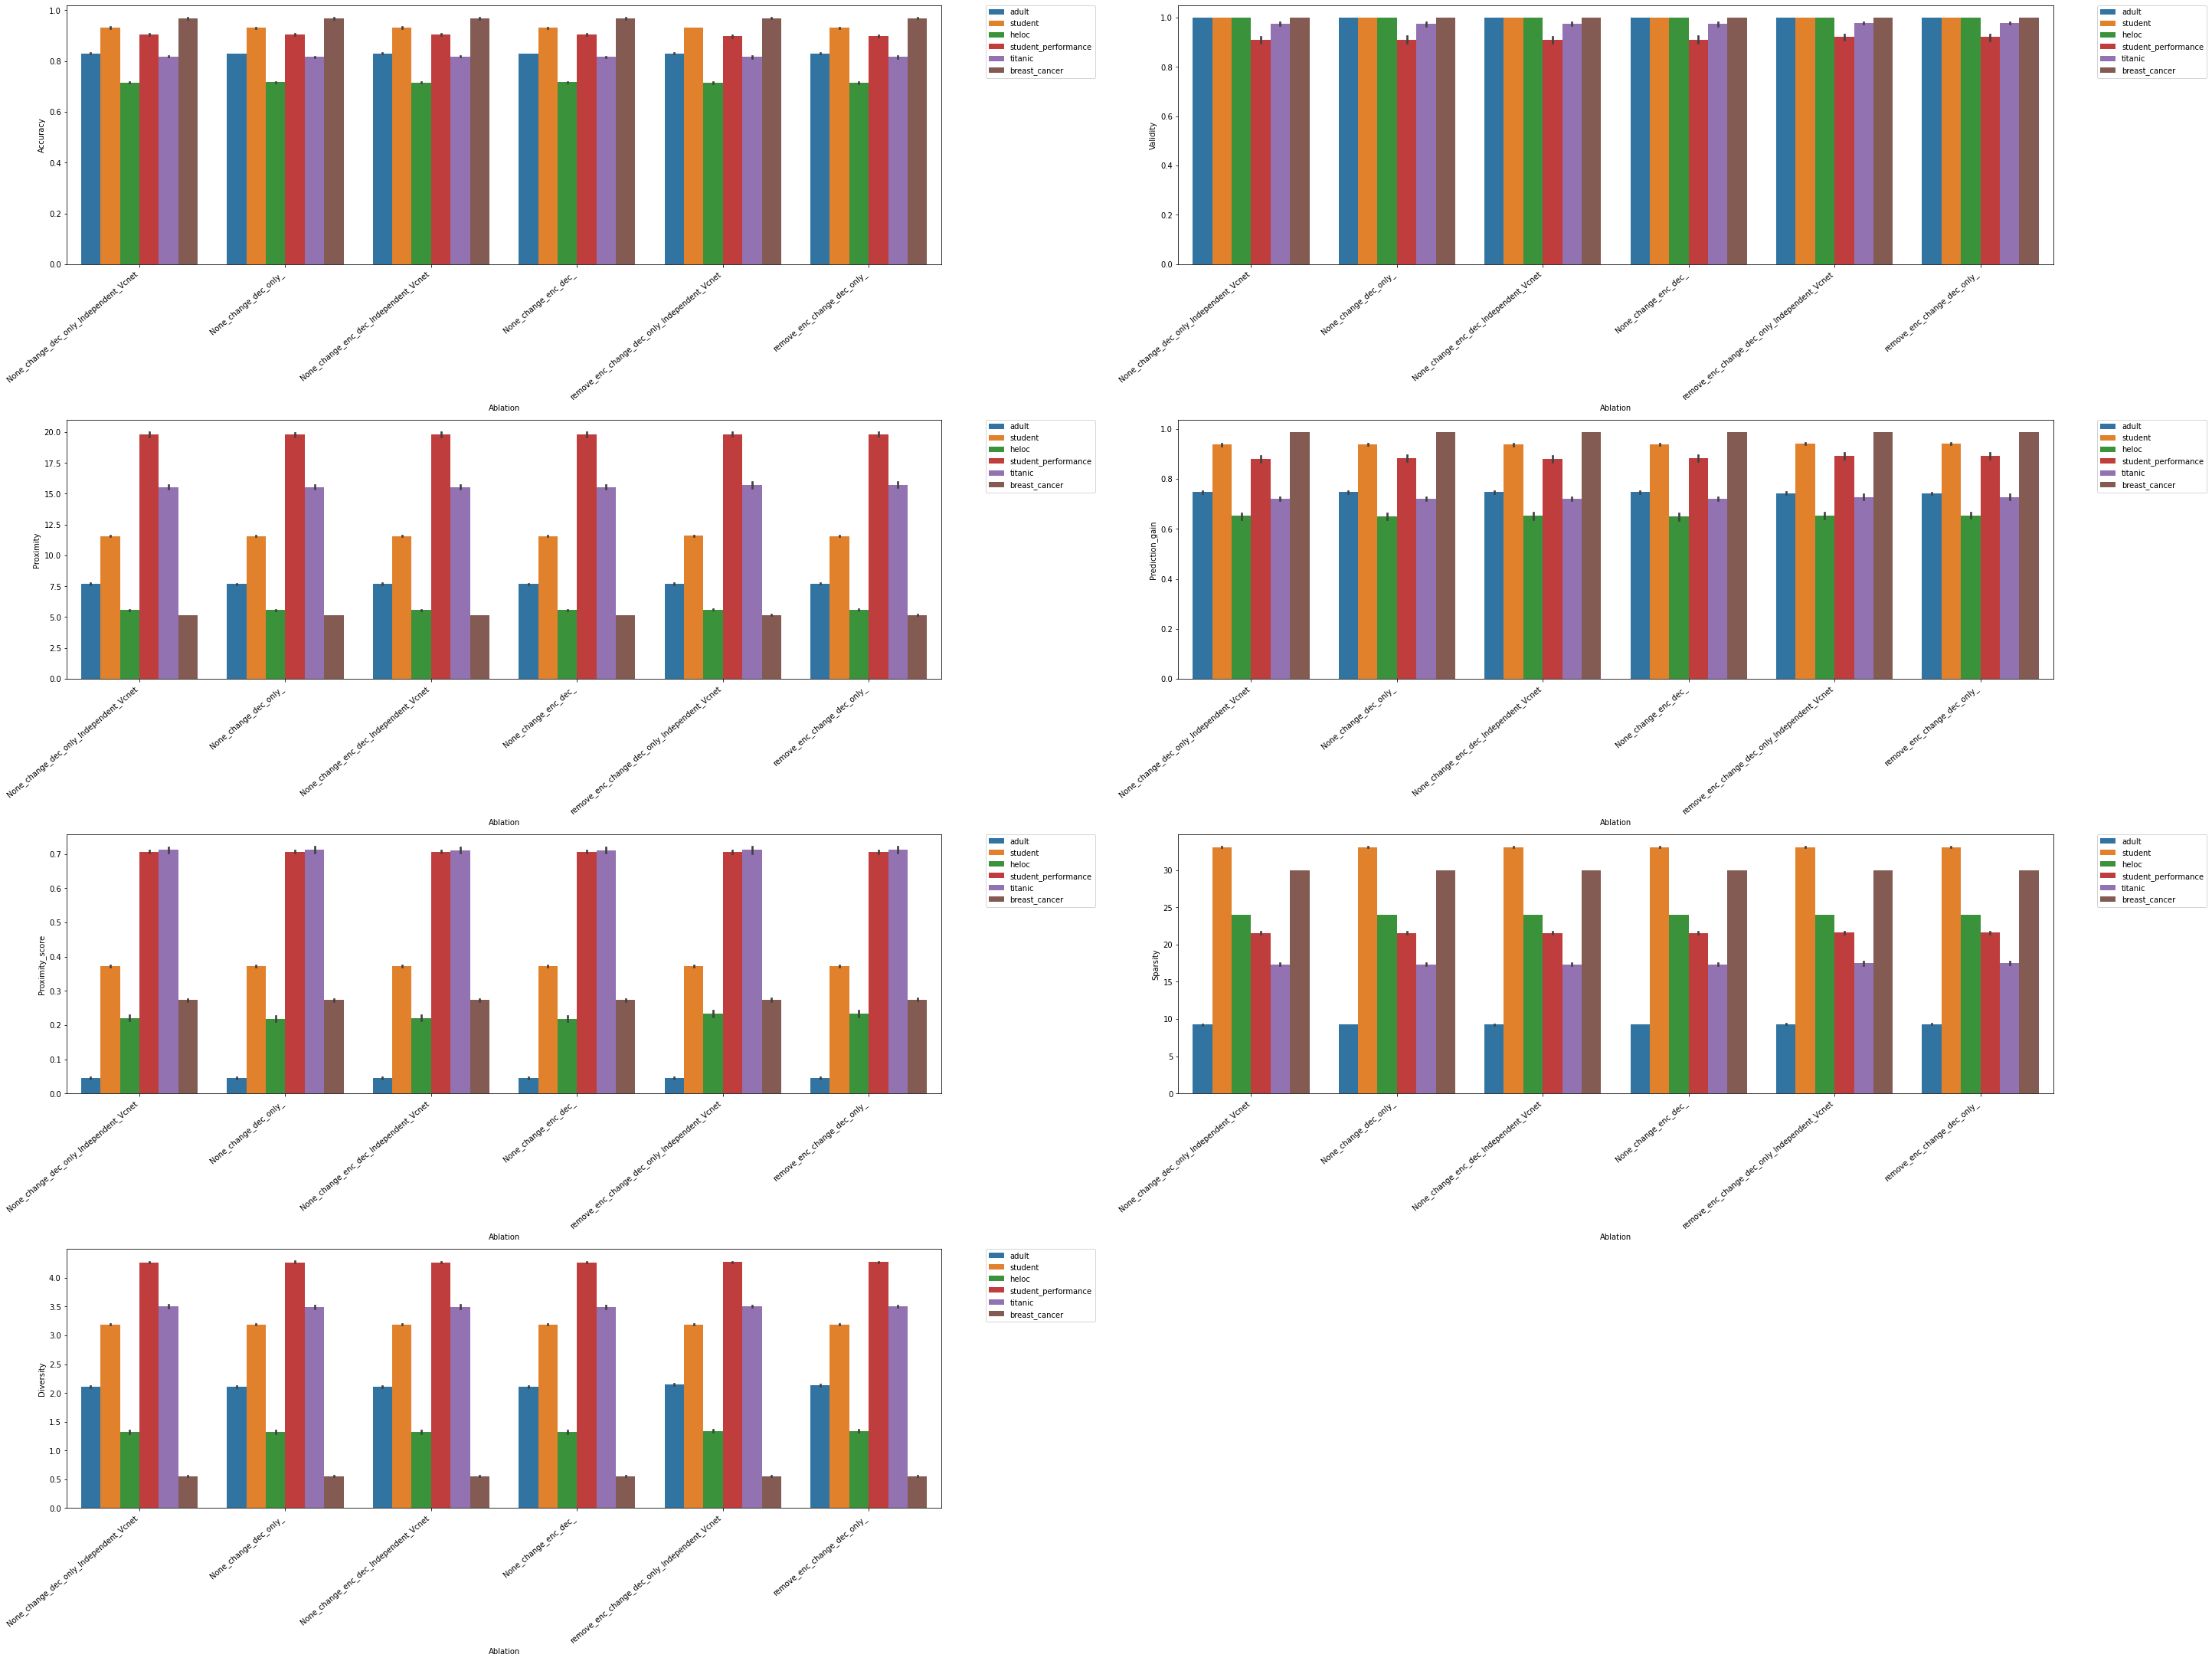

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30),constrained_layout=True)
Metrics = ["Accuracy","Validity","Proximity","Prediction_gain","Proximity_score","Sparsity","Diversity"]
c = 0
axs[-1, -1].axis('off')
for i in range(axs.shape[0]) :
        for j in range(axs.shape[1]) :
            if (i == axs.shape[0]-1 and j == axs.shape[1]-1) : 
                pass
            else : 
                ax = sns.barplot(x="Ablation", y=Metrics[c], hue="Dataset", data=df,ax=axs[i,j])
                ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            c+=1 
#fig.savefig('test.png',transparent=True) 

### MSE study : 

In [8]:
df = pd.DataFrame(columns=["Dataset","Accuracy","Validity","Proximity","Prediction_gain",
                           "Proximity_score","Sparsity","Diversity","Ablation","Seed"])

S = [4,12,34,56,3,67,98,4,23,98]

ablation = [None,"change_enc_dec"]
shared_layers = True
for recon_loss in ["MSE","BCE"] : 
    for seed in S : 
        if recon_loss == "MSE" : 
            data = pd.read_csv("save_metrics/MSE_study/" + "MSE_to_BCE" + "_seed="+str(seed))
            ablation_name = "MSE loss"
        elif recon_loss == "BCE" :
            data = pd.read_csv("save_metrics/new_ablation/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers) +"_seed="+str(seed))
            ablation_name = "BCE loss"
        #ablation_name = '_'.join(np.array(ablation).astype(str))
        # Create (rename) Dataset column 
        data = data.rename({'Unnamed: 0': 'Dataset'}, axis=1)
        # Transform "7.739+/-2.143 " into 7.739 for each metric 
        mean_std_to_mean(data)
        # Write corresponding ablation and seed 
        data["Ablation"] = ablation_name 
        data["Seed"] = seed 
        df = df.append(data,ignore_index = True)

In [13]:
df[df["Seed"] == 4]

,Dataset,Accuracy,Validity,Proximity,Prediction_gain,Proximity_score,Sparsity,Diversity,Ablation,Seed
0,adult,0.829873,0.997789,7.808,0.732,0.069,9.451,2.273,MSE loss,4
1,student,0.930666,0.997178,11.566,0.931,0.376,33.151,3.186,MSE loss,4
2,heloc,0.714340,0.999618,5.565,0.662,0.263,23.958,1.409,MSE loss,4
3,student_performance,0.901840,0.914110,19.790,0.891,0.712,21.558,4.244,MSE loss,4
4,titanic,0.820628,0.982063,16.077,0.740,0.685,17.865,3.494,MSE loss,4
5,breast_cancer,0.972028,1.000000,5.202,0.986,0.268,30.000,0.554,MSE loss,4
42,adult,0.829873,0.997789,7.808,0.732,0.069,9.451,2.273,MSE loss,4
43,student,0.930666,0.997178,11.566,0.931,0.376,33.151,3.186,MSE loss,4
44,heloc,0.714340,0.999618,5.565,0.662,0.263,23.958,1.409,MSE loss,4
45,student_performance,0.901840,0.914110,19.790,0.891,0.712,21.558,4.244,MSE loss,4


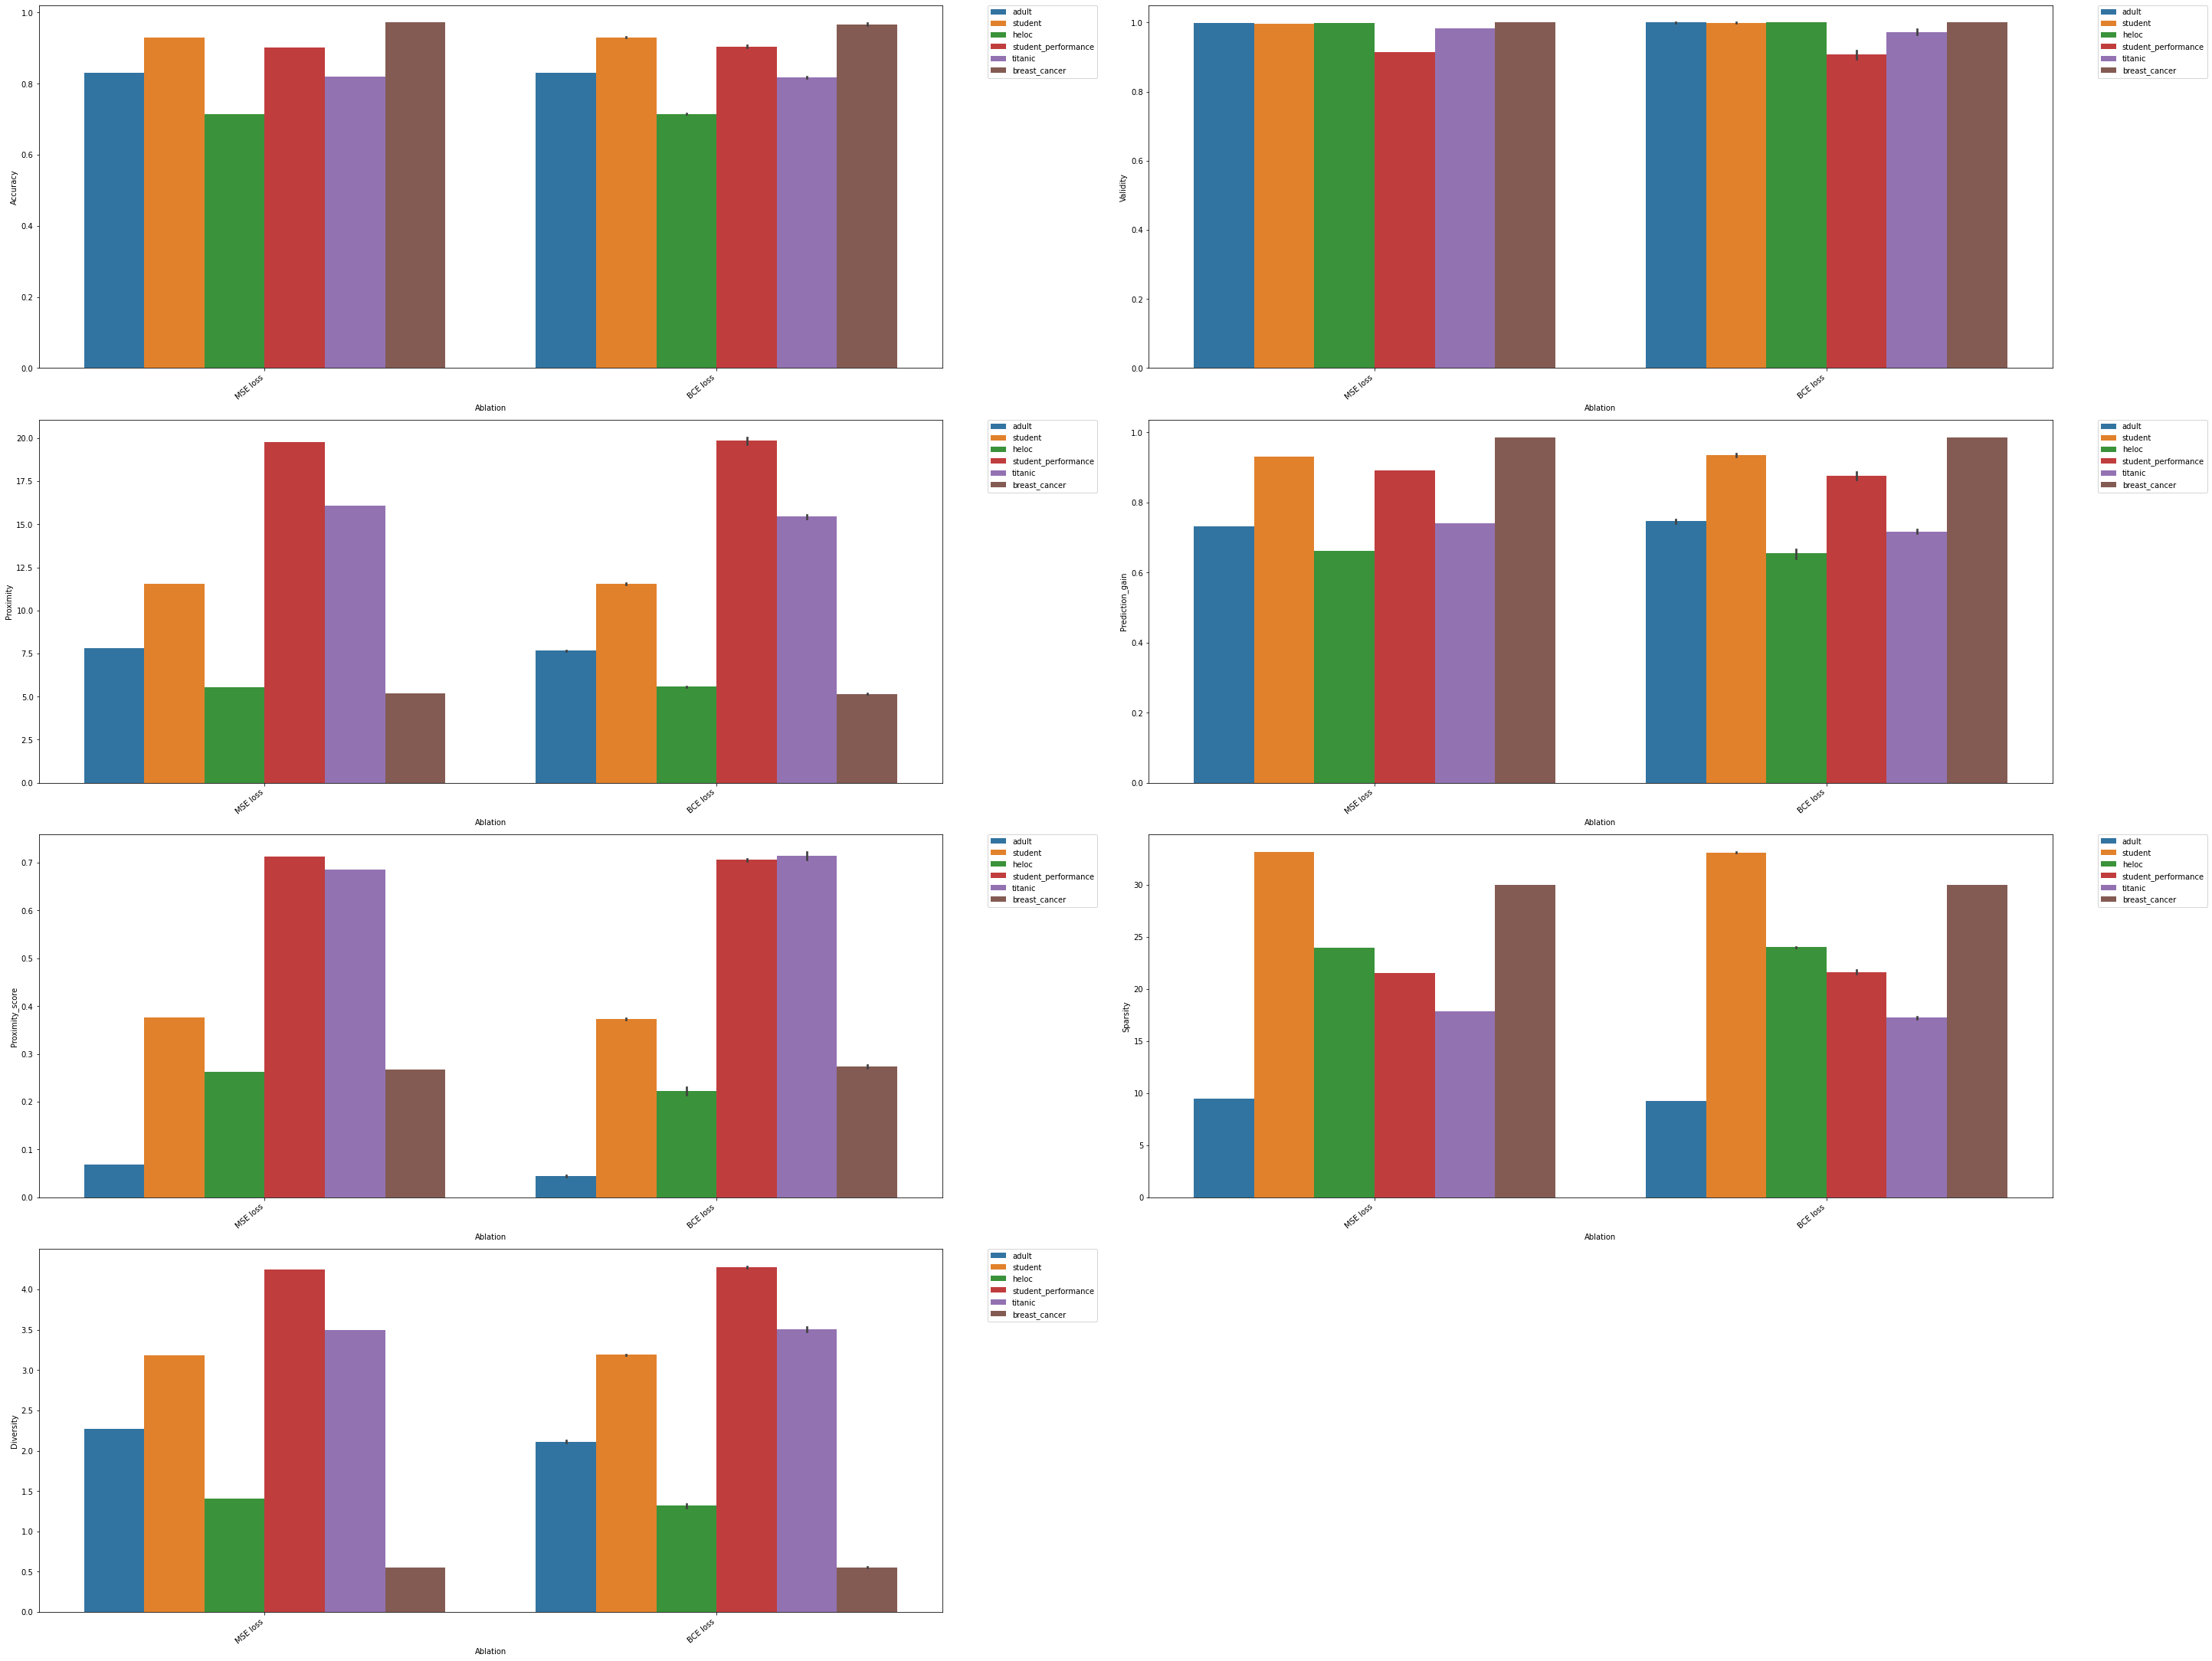

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30),constrained_layout=True)
Metrics = ["Accuracy","Validity","Proximity","Prediction_gain","Proximity_score","Sparsity","Diversity"]
c = 0
axs[-1, -1].axis('off')
for i in range(axs.shape[0]) :
        for j in range(axs.shape[1]) :
            if (i == axs.shape[0]-1 and j == axs.shape[1]-1) : 
                pass
            else : 
                ax = sns.barplot(x="Ablation", y=Metrics[c], hue="Dataset", data=df,ax=axs[i,j])
                ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            c+=1 

Group results by seed :

In [25]:
df

,Dataset,Accuracy,Validity,Proximity,Prediction_gain,Proximity_score,Sparsity,Diversity,Ablation,Seed
0,adult,0.829873,0.997789,7.808,0.732,0.069,9.451,2.273,MSE loss,4
1,student,0.930666,0.997178,11.566,0.931,0.376,33.151,3.186,MSE loss,4
2,heloc,0.714340,0.999618,5.565,0.662,0.263,23.958,1.409,MSE loss,4
3,student_performance,0.901840,0.914110,19.790,0.891,0.712,21.558,4.244,MSE loss,4
4,titanic,0.820628,0.982063,16.077,0.740,0.685,17.865,3.494,MSE loss,4
...,...,...,...,...,...,...,...,...,...,...
115,student,0.930421,0.999632,11.522,0.928,0.374,33.088,3.190,BCE loss,98
116,heloc,0.715105,1.000000,5.604,0.656,0.226,23.988,1.308,BCE loss,98
117,student_performance,0.907975,0.926380,19.743,0.893,0.708,21.521,4.281,BCE loss,98
118,titanic,0.816143,0.991031,15.305,0.719,0.720,17.103,3.506,BCE loss,98


In [28]:
df.groupby(["Ablation","Dataset"]).mean()

Accuracy  Validity  Proximity  Prediction_gain  \
Ablation Dataset                                                               
BCE loss adult                0.830414  0.999767     7.6688           0.7465   
         breast_cancer        0.967133  1.000000     5.1572           0.9863   
         heloc                0.715220  0.999924     5.5715           0.6546   
         student              0.930777  0.999669    11.5479           0.9362   
         student_performance  0.904908  0.907362    19.8540           0.8767   
         titanic              0.817489  0.972197    15.4427           0.7172   
MSE loss adult                0.829873  0.997789     7.8080           0.7320   
         breast_cancer        0.972028  1.000000     5.2020           0.9860   
         heloc                0.714340  0.999618     5.5650           0.6620   
         student              0.930666  0.997178    11.5660           0.9310   
         student_performance  0.901840  0.914110    19.7900           0.8910   
         titanic              0.820628  0.982063    16.0770           0.7400   

                              Proximity_score  Sparsity  Diversity  
Ablation Dataset                                                    
BCE loss adult                         0.0448    9.2576     2.1126  
         breast_cancer                 0.2734   30.0000     0.5553  
         heloc                         0.2218   23.9968     1.3182  
         student                       0.3730   33.0900     3.1888  
         student_performance           0.7061   21.6320     4.2735  
         titanic                       0.7142   17.2357     3.5082  
MSE loss adult                         0.0690    9.4510     2.2730  
         breast_cancer                 0.2680   30.0000     0.5540  
         heloc                         0.2630   23.9580     1.4090  
         student                       0.3760   33.1510     3.1860  
         student_performance           0.7120   21.5580     4.2440  
         titanic                       0.6850   17.8650     3.4940

In [ ]:
for ablation in Ablation_study : 
    for shared_layers in [True,False] : 
        L=[]
        for seed in [42,12,34,56,3,67,98,4,23,8] :
            data = pd.read_csv("save_metrics/new_ablation/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers) +"_seed="+str(seed))
            data_copy = data.copy()
            for col in list(data_copy) : 
                if col not in ["Accuracy","Validity","Unnamed: 0"] :
                    data_copy[col] =  data_copy[col].apply(lambda x : x.split("+")[0])
                    data_copy[col] = pd.to_numeric(data_copy[col])
            L.append(data_copy)
        mean_data_frame_seed = pd.concat(L).groupby("Unnamed: 0").mean()
        std_data_frame_seed  = pd.concat(L).groupby("Unnamed: 0").std()
        final_dataframe = mean_data_frame_seed.round(2).astype(str) + "+/-" +  std_data_frame_seed.round(3).astype(str)
        final_dataframe.to_csv("save_metrics/mean_ablation_seed/metrics_results_" + str(ablation[0]) + str(ablation[1])+str(shared_layers))